## fastai - 14 эпох, accuracy 0.9824

In [1]:
import torch
import fastai
from fastai.vision import *
import os

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# path in fastai format
path = Path(os.getcwd())
path

WindowsPath('D:/python/interview')

In [3]:
# validation 20%, transformation, normalization
data = ImageDataBunch.from_folder(path=path/'raw',
                                 valid_pct=0.2,
                                 seed=42,
                                 ds_tfms=get_transforms(),
                                 size=224,
                                 num_workers=4).normalize(imagenet_stats)

In [4]:
# check classes
print('There are', data.c, 'classes here')
print(data.classes)

There are 2 classes here
['female', 'male']


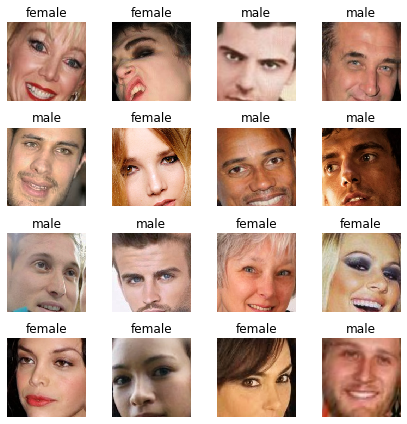

In [5]:
# show_batch
data.show_batch(rows=4, figsize=(6,6))

In [6]:
# our learner 
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [7]:
# train 14 epochs
learn.fit_one_cycle(2)
learn.save('stage-1')

epoch,train_loss,valid_loss,accuracy,time
0,0.145888,0.112134,0.956550,10:50
1,0.111869,0.083105,0.969200,11:49


In [8]:
learn.fit_one_cycle(2)
learn.save('stage-2')

epoch,train_loss,valid_loss,accuracy,time
0,0.096694,0.072405,0.973600,10:45
1,0.082778,0.063955,0.976850,11:13


In [9]:
learn.fit_one_cycle(2)
learn.save('stage-3')

epoch,train_loss,valid_loss,accuracy,time
0,0.090133,0.063514,0.976900,10:54
1,0.071568,0.057835,0.979400,10:45


In [10]:
learn.fit_one_cycle(2)
learn.save('stage-4')

epoch,train_loss,valid_loss,accuracy,time
0,0.085223,0.063853,0.976300,10:44
1,0.064502,0.053474,0.981250,10:47


In [11]:
learn.fit_one_cycle(2)
learn.save('stage-5')

epoch,train_loss,valid_loss,accuracy,time
0,0.075398,0.055552,0.981050,10:57
1,0.072592,0.052843,0.981850,10:57


In [12]:
learn.fit_one_cycle(4)
learn.save('stage-6')

epoch,train_loss,valid_loss,accuracy,time
0,0.079094,0.056032,0.981000,11:14
1,0.063004,0.053459,0.982000,11:09
2,0.050023,0.050801,0.982350,11:11
3,0.047183,0.050337,0.982400,11:14


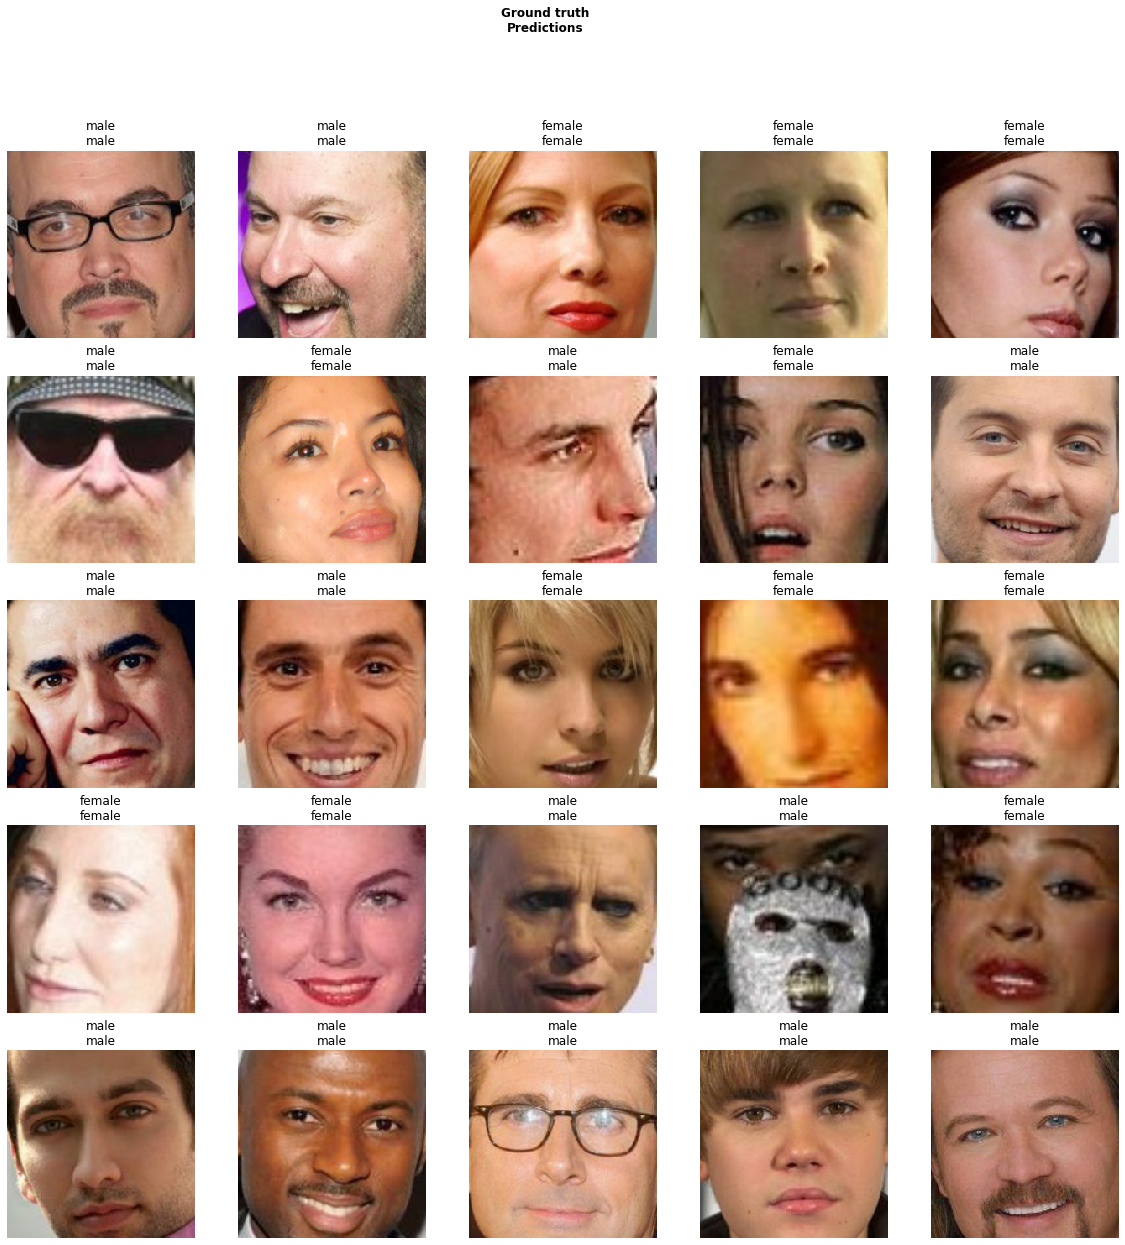

In [13]:
# check predictions
learn.show_results()

## Проверим, на каких фотографиях наша модель ошибалась

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

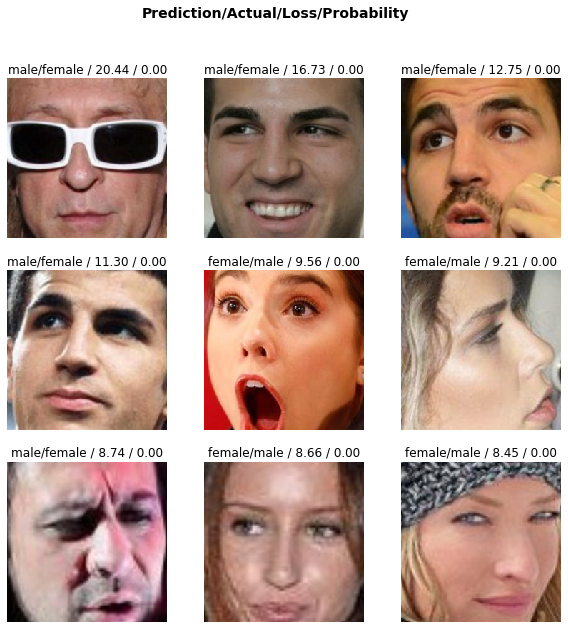

In [19]:
interp.plot_top_losses(9, figsize=(10,10))

### Как видим, наша модель вообще не ошибается. Все "ошибки" это неправильно расставленные лейблы в тестовой выборке

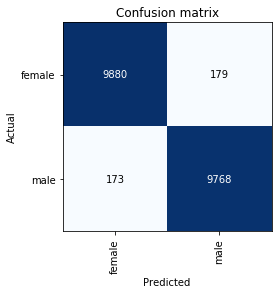

In [21]:
interp.plot_confusion_matrix(figsize=(4,4))

In [22]:
# export finished model
learn.export()